In [1]:
# https://www.semion.io/doc/statistical-mechanics-of-money


In [10]:
# Importar librerías científicas

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import *
import matplotlib.animation as animation

In [3]:
# Crear estilo de plots
# IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [29]:
class System(object):
    def __init__(self, M, N, deltam):
        self.M = M #static
        self.N = N #static
        self.deltam = deltam #static
        self.avg0 = M/N #static
        
        self.agents = self.avg0*np.ones((N,1)) #dynamic
        self.iterations = 0 #dynamic
        self.transactions = 0 #dynamic

    def getAgents(self):
        return self.agents
    
    def setAgents(self,agents):
        self.agents = agents
        
    def getIterations(self):
        return self.iterations
    
    def setIterations(self, iterations):
        self.iterations = iterations
        
    def getTransactions(self):
        return self.transactions
    
    def setTransactions(self,transactions):
        self.transactions = transactions
        
    def iterate(self, times=1):
        
        indices = np.arange(0,self.N)
        
        for iteration in range(times):
            for k in range(len(self.agents)):
                l = np.random.choice(indices, 1)
                self.simulateTransaction(k,l)
            self.iterations += 1

        
    def simulateTransaction(self,k,l):
        
#         if np.random.random() < 0.5:
#             s = 1
#         else:
#             s = -1
            
        auxAgents = self.getAgents().copy()
        auxDeltam = self.deltam
        mny = auxAgents[l].copy() - auxDeltam
        
        if(mny >= 0):
            auxAgents[k] = auxAgents[k] + auxDeltam
            auxAgents[l] = auxAgents[l] - auxDeltam
            self.transactions += 1
        else:
            if(mny < -0.5):
                print('alert')
            
        self.setAgents(auxAgents)
            
    def getEntropy(self,numClasses, mMax):
        return S(self.agents, numClasses, mMax)
    
    def getRichestAgent(self):
        return np.max(self.agents)

    
# Function S takes an array of real numbers (i.e. the amount of money each agent has) and calculates entropy
def S(agents, numClasses, mMax):
    frequencies, binEdges = np.histogram(agents, bins=numClasses, range=[0,mMax])
    agents = np.array(agents)
    positiveFrequencies = frequencies[frequencies > 0]
    return N*np.log(N) - np.sum(positiveFrequencies*np.log(positiveFrequencies)) 


def runSystemEvolution(system, snapshots, iterations = 1):

    for i in range(snapshots):
        sys.iterate(iterations)
        arrStates.append(sys.getAgents())
        arrTransactions.append(sys.getTransactions())

def calculateEntropiesEvolution(numClasses,mMax):
    
    for state in arrStates:
        arrEntropies.append(S(state,numClasses,mMax))
        
def plotStateProgession(index):
    plotState(arrStates[index], arrTransactions[index], arrTransactions[-1], arrEntropies[index],numClasses,mMax)
    
def plotState(agents, transactionsToBeMade, transactionsMade, systemEntropy, numClasses,mMax):
    
    # ax is the variable where simulations are going to be graphed
    # these figures should already exist when executing this function
    for ax in (ax1,ax2):
        ax.cla()
    
    titleContent = "Statistical Mechanics of Money \n"
    titleContent += "\n"    
    titleContent += "Total transactions: " + str(transactionsMade) + "\n"
    titleContent += "M = " + str(M) + " (money units)   |    N = " + str(N) + " (people) \n"
    titleContent += "Progress: " + str(np.round((transactionsToBeMade/transactionsMade)*100, 4)) + "%"
  
    plt.suptitle(titleContent);
    plt.subplots_adjust(top=0.77);
    plt.subplots_adjust(bottom=0.1)
    fig.subplots_adjust(hspace=0.5)
    fig.subplots_adjust(wspace=0.5)

    # Start subplots
    ax1.set_title('counts')
    ax1.set_xlabel('[money units]')
    ax1.set_ylabel('[counts]')
    ax1.hist(agents, bins=numClasses, range=[0,mMax])

    ax2.set_title('ln(counts)')
    ax2.set_xlabel('[money units]')
    ax2.set_ylabel('[counts]')
    ax2.hist(agents, bins=numClasses, range=[0,mMax])   
    ax2.set_yscale('log')
    
    ax3.set_title("Current entropy: S = " + str(np.round(systemEntropy,10)))
    ax3.set_xlabel('[transactions]')
    ax3.set_ylabel('S')
    y_data.append(systemEntropy)
    x_data.append(transactionsToBeMade)
    ax3.plot(x_data,y_data, 'm')
    

In [20]:
M = 10000 # total amount of money in system
N = 5000 # number of agents
deltam = 0.4 # amount of money exchanged in each transaction




# DON'T MODIFY BELLOW THIS LINE
sys = System(M,N,deltam)

arrStates = []
arrTransactions = []


In [22]:
# ADD ITERATIONS TO CURRENT SYSTEM
snapshots = 100
iterations = 1
runSystemEvolution(sys, snapshots, iterations)




<IPython.core.display.Javascript object>


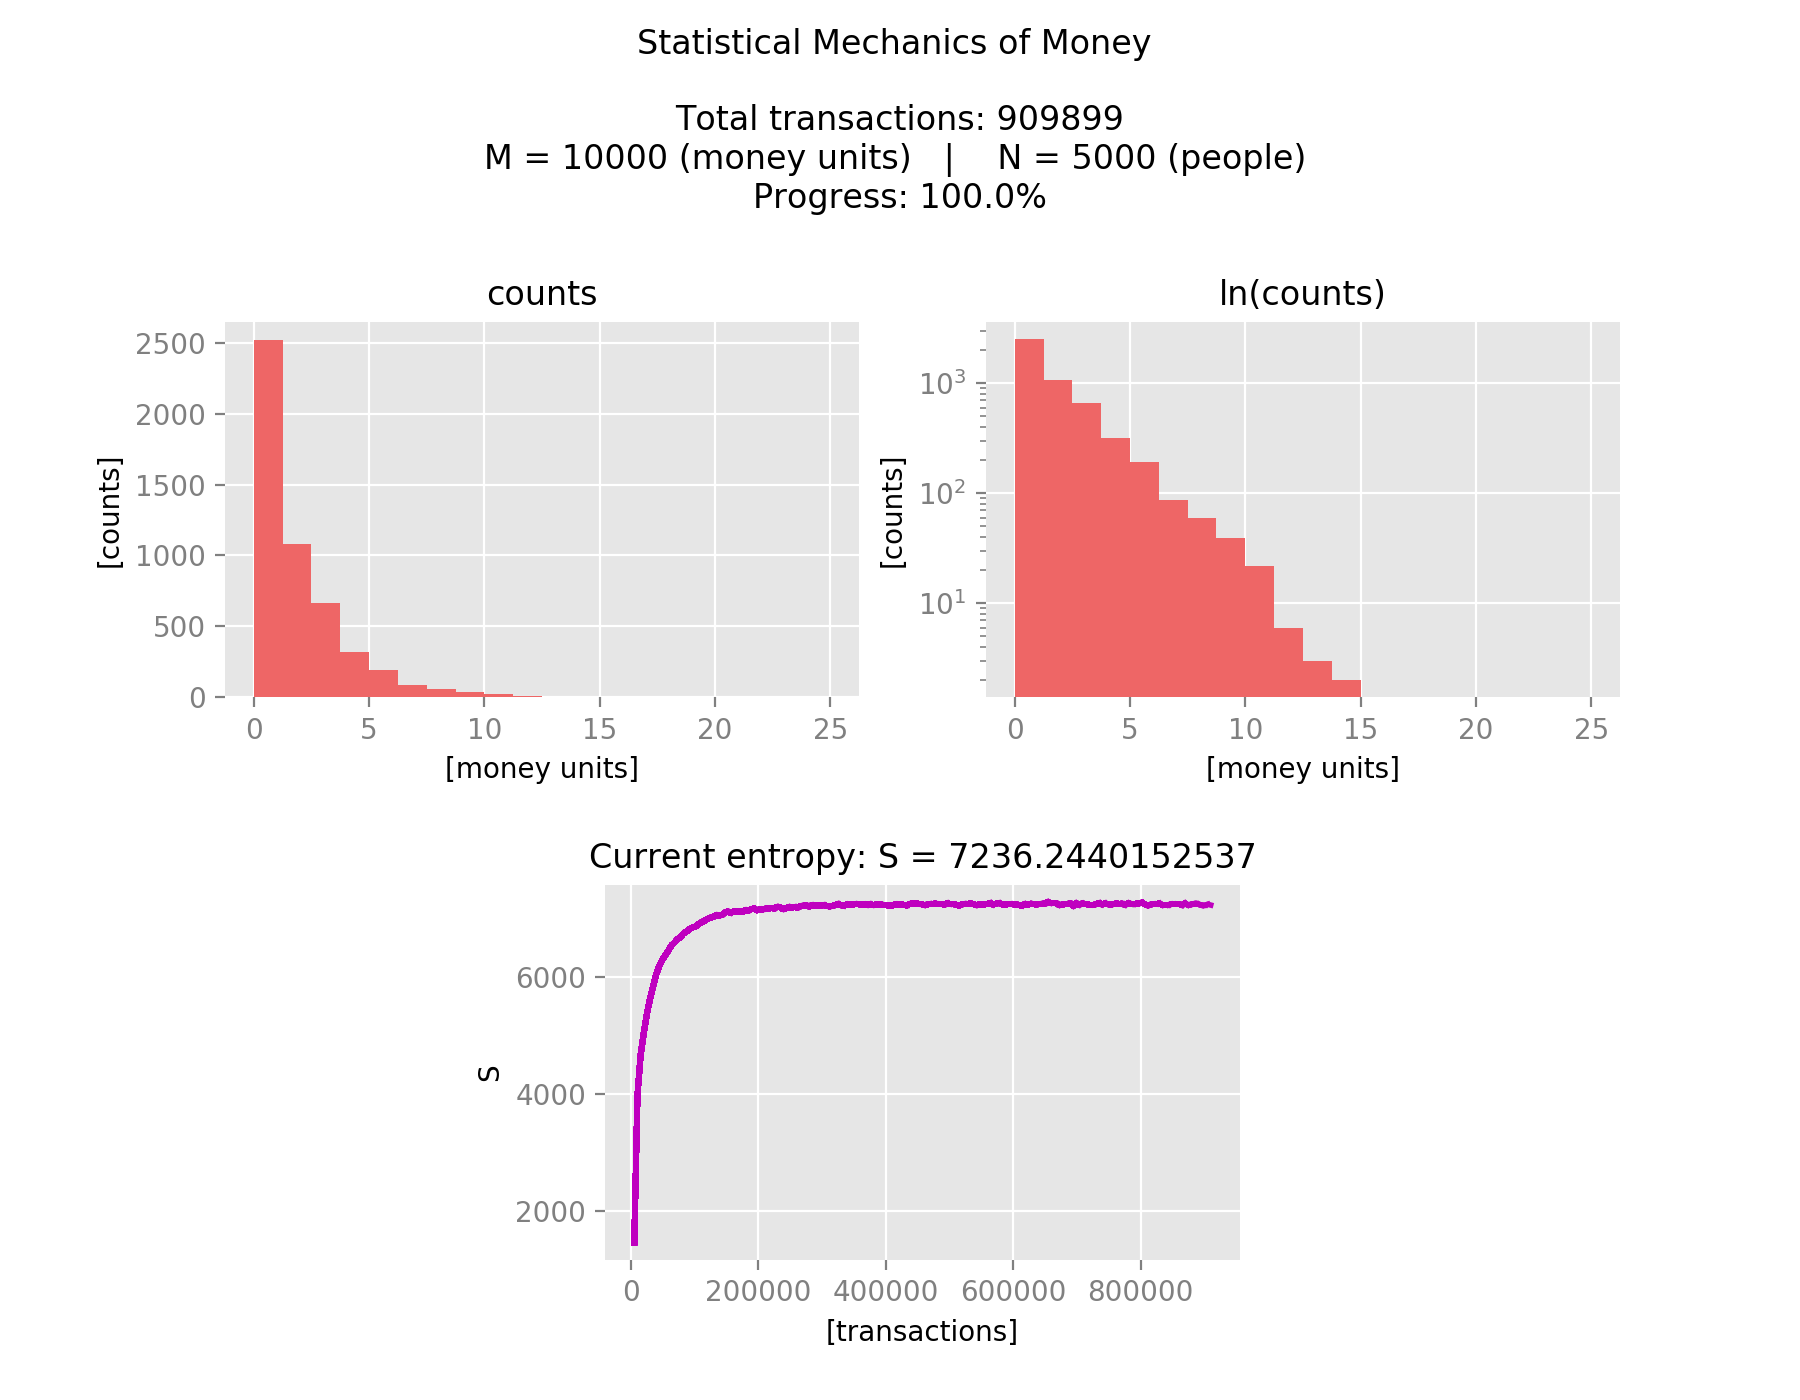

In [30]:
# ---------- SIMULATION PLOTTING CELL -----------------
if 'fig' in globals():
    plt.close(fig)
    
    

# IT IS BETTER TO CALCULATE THE ENTROPIES RIGHT BEFORE THE SIMULATION BECAUSE
# BY THAT MOMENT YOU HAVE THE HISTORICAL SYSTEM INFO
numClasses = 20
mMax = 25
arrEntropies = []
calculateEntropiesEvolution(numClasses,mMax)
y_data = []
x_data = []

# %matplotlib nbagg
%matplotlib tk
# %matplotlib TkAgg
# %matplotlib notebook
# %matplotlib auto


fig = plt.figure(figsize=(9,7))
gs = fig.add_gridspec(2, 4)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, -2:])
ax3 = fig.add_subplot(gs[1, 1:3])


simulation = animation.FuncAnimation(fig, plotStateProgession, interval=1, repeat=True)
plt.show()





In [9]:
# ---------- ENTROPY PLOT CELL -----------------
numClasses = 20
mMax = 25
arrEntropies = []
calculateEntropiesEvolution(numClasses,mMax)


%matplotlib auto


plt.plot(arrEntropies)

Using matplotlib backend: TkAgg


In [90]:
sys.getIterations()

558

In [18]:
plt.plot(arrEntropies)

# S(arrStates[0], numClasses,30)

sys.getRichestAgent()

17.0

In [26]:

M = 10000 # total amount of money in system
N = 5000 # number of agents
deltam = 1 # amount of money exchanged in each transaction
sys = System(M,N,deltam)

numClasses = 20
mMax = 7000
arrStates = []
arrEntropies = []
arrTransactions = []
for i in range(1000):
    sys.iterate()
    arrStates.append(sys.getAgents())
    arrEntropies.append(sys.getEntropy(numClasses,mMax))
#     arrTransactions.append(sys.getTransactions())

plt.plot(arrTransactions,arrEntropies)

ValueError: x and y must have same first dimension, but have shapes (0,) and (1000,)

In [30]:
plt.plot(arrEntropies)

np.max(sys.getAgents())

126.0

In [24]:
for i in range(1000):
    sys.iterate()
    arrStates.append(sys.getAgents())
    arrEntropies.append(sys.getEntropy(numClasses,mMax))

plt.plot(arrEntropies)

KeyboardInterrupt: 

In [4]:

# Declaración de funciones de simulación



def simulateTransaction(k,l):
    
    if np.random.random() < 0.5:
        s = 1
    else:
        s = -1
        
    mny = agents[l] - s*deltam 

    if(mny >= 0):
        agents[k] = agents[k] + s*deltam
        agents[l] = agents[l] - s*deltam

        
        
def simulateRandomTransaction(k):
    k = np.random.choice(indices, 1)
    simulateTransaction(k,l)



    
def updateSystemState(agents):
    
    for k in range(len(agents)):
        simulateRandomTransaction(k)
    
    # Do update of system state
    arrS.append(S(agents))
    arrStates.append(agents.copy())

def getIterationsMade():
    
    
def getTransactionsMade():
    # this arrS length was a hack since code would let me define a transactionsMade variable
    # in this cell without it crashing when trying to update it in updateSystemState
    return (len(arrS)-1)*updateEvery
    
    
def plotStateProgession(index):
    transactionsToBeMade = index*updateEvery
    transactionsMade = getTransactionsMade()
    plotState(arrStates[index], transactionsToBeMade, transactionsMade, arrS[index])

    
def plotState(agents, transactionsToBeMade, transactionsMade, systemEntropy):
    
    # ax is the variable where simulations are going to be graphed
    # these figures should already exist when executing this function
    for ax in (ax1, ax2, ax3, ax4):
        ax.clear()

    transactions = getTransactionsMade()
    
    titleContent = "Statistical Mechanics of Money \n"
    titleContent += "\n"    
    titleContent += "Transactions made: " + str(transactionsMade) + "\n"
    titleContent += "Progress: " + str(np.round((transactionsToBeMade/transactionsMade)*100, 4)) + "% \n"
    titleContent += "Current entropy: S = " + str(np.round(systemEntropy,10)) + "\n"  
    titleContent += "\n"    
    titleContent += "Total money: " + str(M) + " (money units) \n"
    titleContent += "Num. of agents: " + str(N) + " (people) \n"
    titleContent += "Richest agent has: " + str(np.max(agents)) + " (money units)"
    
    plt.suptitle(titleContent);
    plt.subplots_adjust(top=0.6);
    plt.subplots_adjust(bottom=0.2)
    fig.subplots_adjust(hspace=0.6)

    # Start subplots
    ax1.set_title('counts')
    ax1.set_ylim([0,1.05*N])
    ax1.set_xlabel('[money units]')
    ax1.set_ylabel('[counts]')
    hist, bins, _ = ax1.hist(agents, bins=numClasses, range=[0,xMax])

    ax2.set_title('ln(counts)')
    ax2.set_ylim([1,10**3])
    ax2.set_xlabel('[money units]')
    ax2.set_ylabel('[counts]')
    ax2.hist(agents, bins=numClasses, range=[0,xMax])   
    ax2.set_yscale('log')

    ax3.set_title('counts')
    ax3.set_xlabel('[money units]')
    ax3.set_ylabel('[counts]')
    hist, bins, _ = ax3.hist(agents, bins=numClasses, range=[0,xMax])

    ax4.set_title('ln(counts)')
    ax4.set_xlabel('[money units]')
    ax4.set_ylabel('[counts]')
    ax4.hist(agents, bins=numClasses, range=[0,xMax])   
    ax4.set_yscale('log')
    

In [5]:
# --------- DO NOT MODIFY BELOW THIS CELL ---------
# --------- Run this cell to get a fresh new simulation ------------

avg0 = M/N
indices = np.arange(0,N)
agents = avg0*np.ones((N,1))
arrStates = [agents.copy()]
arrS = [S(agents)];# array that will store the calculated entropies in time




In [ ]:
print('STATE INFO BEFORE RUNNING CALCULATIONS');
print('Number of iterations made globally: ' + str(getIterationsMade()))


In [6]:
# ---------- SIMULATION CALCULATIONS CELL -----------------

# updateEvery variable depends on the amount of time we want the program to let us know about the state of the system. 
# let's think a little bit about the amount of times we as individuals don't spend any money in a random day.
# since i don't really know this quantitively, i will just make an empirical guess and say that 5% of the days
#     of the year i don't really spend any money on absolutely anything. the rest of the days i would make from 
#     one to six transactions a day. let's say that on average i do three transactions a day just to be able 
#     on a single number. and now i will also expect all agents in the system to do the same average amount of
#     transactions in a day. 
#
# total amount of transactions that happen in a day: 3*N [transactions/day]
# total amount of transactions that happen in a year: 3*N*365*0.05 [transactions/year]
# total amount of transactions that happen in X years: 3*N*365*0.05*X

# total amount of transactions that happen in a day: 3*N [transactions/day]
# total amount of transactions that happen in a month: 3*N*30*(0.95) [transactions/month]
# total amount of transactions that happen in X months: 3*N*30*(0.95)*X [transactions/month]
#
# our little community of 500 agents with 2 [moey units] each will be doing transactions and
# every year we will see whats the state they are in, each year we will ask them each how much money do 
# they have and we will calculate some statistics about it. 

# X = 60 #number of {update time unit} we want to observe
# numberOfTransactions = np.floor(3*N*365*3*0.95*X ).astype(int)
updateEvery = np.floor(3*N*365*3*0.95).astype(int) # do {{updateEvery}} transactions and then save agents data to arrS and arrStates
numOfUpdates = 50000

print('STATE INFO BEFORE RUNNING CALCULATIONS');
print('Number of transactions made globally: ' + str(getTransactionsMade()))
print('Number of transactions to make in this run: ' + str(numberOfTransactions));
print('Number of global transactions number to be made: ' + str(getTransactionsMade() + numberOfTransactions));
print('Number of transactions before taking snapshot: ' + str(updateEvery));
print('Number of snapshots to be taken: ' + str(numOfUpdates));
print('Number of snapshots taken globally: ' + str(len(arrS)));
print('\n');


for updateIndex in range(numOfUpdates):
    updateSystemState(agents)

print('Successfully ran all additional transactions.');
print('\n');

print('STATE INFO AFTER RUNNING CALCULATIONS');

print('Number of transactions made globally: ' + str(getTransactionsMade()))
print('Number of transactions made in this run: ' + str(numberOfTransactions));
print('Number of global transactions number now made: ' + str(getTransactionsMade()));
print('Number of transactions before taking snapshot: ' + str(updateEvery));
print('Number of snapshots taken: ' + str(numOfUpdates));
print('Number of snapshots taken globally: ' + str(len(arrS)));


STATE INFO BEFORE RUNNING CALCULATIONS


NameError: name 'updateEvery' is not defined

In [11]:
# ---------- ENTROPY PLOT CELL -----------------

%matplotlib auto

plt.plot(arrS)


Using matplotlib backend: TkAgg


In [12]:
# ---------- SIMULATION PLOTTING CELL -----------------
if 'fig' in globals():
    plt.close(fig)
    
    
fig, ([ax1, ax3, ax2, ax4]) = plt.subplots(1, 4, figsize=(20,6)) 
simulation = animation.FuncAnimation(fig, plotStateProgession, interval=1, repeat=True)
plt.show()



Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 118, in _on_timer
    TimerBase._on_timer(self)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1194, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1447, in _step
    still_going = Animation._step(self, *args)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1173, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/an

In [24]:
Mmax = 2*1000/20

print(Mmax)

delta = Mmax/20

print(delta)

money = [];

for i in range(21):

    money.append(i*delta)
    
money

plt.hist(money, bins=20, range=(0,100))

np.sum(money)


100.0
5.0


1050.0

In [24]:
# ---------- HISTOGRAM OF AGENTS -----------------

agents
# plt.hist(agents)

array([[ 0. ],
       [ 3.5],
       [ 0. ],
       [ 1. ],
       [ 0. ],
       [ 2. ],
       [ 6. ],
       [ 1.5],
       [ 0.5],
       [ 2. ],
       [ 5. ],
       [ 5. ],
       [ 6. ],
       [ 4. ],
       [ 0.5],
       [ 3.5],
       [ 1. ],
       [ 2. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 5.5],
       [ 0.5],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 2. ],
       [ 4.5],
       [ 3. ],
       [ 5. ],
       [ 0. ],
       [ 1. ],
       [ 0. ],
       [ 0.5],
       [ 4. ],
       [ 2.5],
       [ 2.5],
       [ 3. ],
       [ 2.5],
       [ 0.5],
       [ 1. ],
       [ 0.5],
       [ 1.5],
       [ 1. ],
       [ 0. ],
       [ 2. ],
       [ 2.5],
       [ 3.5],
       [ 1. ],
       [ 1. ],
       [ 2. ],
       [11.5],
       [ 2.5],
       [ 2. ],
       [ 4. ],
       [ 1.5],
       [ 1.5],
       [ 1. ],
       [ 1. ],
       [ 5. ],
       [ 4.5],
       [ 2. ],
       [ 3. ],
       [ 2.5],
       [ 1

In [ ]:
np.max(agents)

plt.plot(agents)

In [60]:
# --------------- FILE SAVING CELL --------------

npArrStates = np.array(arrStates[0])

for index in range(len(arrStates)-1):
    npArrStates = np.concatenate((npArrStates, np.array(arrStates[index+1])),axis=1)

np.savetxt('arrStates_1046_states.csv', npArrStates, delimiter=',', fmt='%d')


(50000, 1046)


In [ ]:
csv = np.genfromtxt('arrStates_1046_states.csv', delimiter=",")


In [72]:
csv


array([[   2.,    2.,   -1., ...,   99.,   99.,   99.],
       [   2.,    3.,    3., ..., -151., -149., -148.],
       [   2.,    2.,    0., ...,  -52.,  -52.,  -52.],
       ...,
       [   2.,    2.,   -2., ...,  -46.,  -46.,  -47.],
       [   2.,    5.,    8., ...,  -37.,  -37.,  -35.],
       [   2.,    3.,   -1., ...,   87.,   89.,   86.]])

In [12]:
# For closing all figures with code
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.close.html

# For if you wanted to try different backends
# https://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot
